# Importing necessery libraries


In [24]:
import pandas as pd
import numpy as np

# Importing Dataset

In [25]:
data=pd.read_csv(r"C:\Users\darap\Downloads\data.csv")

In [26]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [27]:
data.shape

(2227, 3)

In [28]:
data.y.value_counts()

0    1242
1     985
Name: y, dtype: int64

In [29]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

# There are null values in the dataset 

In [30]:
data=data.dropna()
#dropping the null values

In [31]:
data.isnull().sum()
#after dropping the null values

x1    0
x2    0
y     0
dtype: int64

# Importing the visualization libraries

In [32]:
import seaborn as sns
import plotly.express as px

In [33]:
px.box(data,'x1')

# There are no outliers in columm x1

In [34]:
px.box(data,'x2')


# There are no outliers in columm x2

In [35]:
d=data.loc[(data.x2>135),:]
d
# the ouliers in x2 columns

,x1,x2,y
1541,66.633331,99009998.0,0
2226,109.624009,99999999.0,0


In [36]:
data=data.drop([1541,2226])
# Removing the outliers in x2 using index drop

In [37]:
px.box(data,'x2')
# after removal of outliers in x2 column

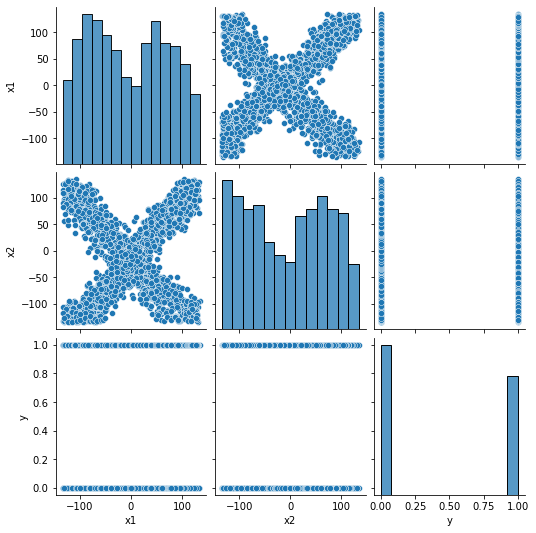

In [38]:
sns.pairplot(data)
# vizualising the datapoints using pairplot

In [39]:
y_data=data.y

In [40]:
x_data=data.drop("y",axis=1)

In [41]:
x_data

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000
...,...,...
2221,88.129639,107.514918
2222,98.714112,89.643117
2223,96.633331,91.000000
2224,85.673940,103.839270


In [42]:
# standardising the data
from sklearn.preprocessing import StandardScaler

rescale = StandardScaler()

stand_train_data = rescale.fit_transform(x_data)

In [43]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,train_size = 0.80, random_state = 0)

In [44]:
x_test

,x1,x2
2221,88.129639,107.514918
101,-80.771472,63.145431
986,96.544321,129.219178
1983,94.138720,63.481282
40,-106.665999,102.548363
...,...,...
2119,-48.366669,-107.000000
2098,-80.366669,-132.000000
1501,110.633331,72.000000
87,-67.366669,51.000000


# Importing machine learning models

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
import math

In [46]:
# Logistic regerssion
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.483977514182461


In [47]:
# Svm using linear kernel
svclassifier = SVR(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6017927714803515


In [56]:
# Svm using linear rbf
svclassifier = SVR(kernel='rbf')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.1896897704018691


In [57]:
# KNN regression
classifier = KNeighborsRegressor(n_neighbors=3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.17037907450455597


In [58]:
# Decision tree Regressor
clf = DecisionTreeRegressor(criterion="mse", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.32906097683644847


# From the above models svm linear kerneal is performing better than any other models